In [109]:
import pandas as pd
import pylab
#import seaborn as sn
import numpy as np
#import matplotlib as plt
%matplotlib inline

In [16]:
data = pd.read_csv('marscrater_pds.csv', low_memory=False,na_values = [" "])

Our research question is **Are most of the Mars craters created by foreign body impact?** 
To answer it we need to understand the relationship between:
* crater size (DIAM_CIRCLE_IMAGE, DEPTH_RIMFLOOR_TOPOG) 
* and the spatial locaton of the crater (LONGITUDE_CIRCLE_IMAGE, LATITUDE_CIRCLE_IMAGE). 

##Quality of the data

We will first explore the data and undertand its quality

In [17]:
print "Dataset has %i observations and %i variables.\nDetailed info follows:" %(len(data),len(data.columns))
data.info()
#data = data.convert_objects(convert_numeric=True)
#data.info()
print "\nFirst 5 columns look like this:"
data.head(5)

Dataset has 384343 observations and 10 variables.
Detailed info follows:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384343 entries, 0 to 384342
Data columns (total 10 columns):
﻿CRATER_ID                384343 non-null object
CRATER_NAME               987 non-null object
LATITUDE_CIRCLE_IMAGE     384343 non-null float64
LONGITUDE_CIRCLE_IMAGE    384343 non-null float64
DIAM_CIRCLE_IMAGE         384343 non-null float64
DEPTH_RIMFLOOR_TOPOG      384343 non-null float64
MORPHOLOGY_EJECTA_1       44625 non-null object
MORPHOLOGY_EJECTA_2       19476 non-null object
MORPHOLOGY_EJECTA_3       1293 non-null object
NUMBER_LAYERS             384343 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 32.3+ MB

First 5 columns look like this:


,﻿CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,NaN,84.367,108.746,82.10,0.22,NaN,NaN,NaN,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,NaN,3
2,01-000002,NaN,69.244,-27.240,79.63,0.09,NaN,NaN,NaN,0
3,01-000003,NaN,70.107,160.575,74.81,0.13,NaN,NaN,NaN,0
4,01-000004,NaN,77.996,95.617,73.53,0.11,NaN,NaN,NaN,0


In [55]:
# create a new dataframe with percentage population of columns in client dataframe
columns = ["Field name","Percent filled"]
dataFillInformation = pd.DataFrame(columns = columns)

for column in data.columns:
    null = data[column].notnull().sum()
    percent_not_null = (null/float(len(data))*100)
    new_row = pd.DataFrame({"Field name": [column], "Percent filled": [percent_not_null]})
    dataFillInformation = pd.concat([dataFillInformation,new_row])
dataFillInformation

,Field name,Percent filled
0,﻿CRATER_ID,100.000000
0,CRATER_NAME,0.256802
0,LATITUDE_CIRCLE_IMAGE,100.000000
0,LONGITUDE_CIRCLE_IMAGE,100.000000
0,DIAM_CIRCLE_IMAGE,100.000000
0,DEPTH_RIMFLOOR_TOPOG,100.000000
0,MORPHOLOGY_EJECTA_1,11.610723
0,MORPHOLOGY_EJECTA_2,5.067349
0,MORPHOLOGY_EJECTA_3,0.336418
0,NUMBER_LAYERS,100.000000


We can see that informations we need is available for every crater in database.

##Data distributions

Our data is continous and has too many unique values to interpret by frequency table, I will use spread instead.

In [65]:
craterDimensions= ['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']
craterLocation = ['LONGITUDE_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE']
for column in  craterDimensions:
    print "\nStatistics for variable %s" %column
    print data[column].describe()


#data.DIAM_CIRCLE_IMAGE.value_counts(sort=True)


Statistics for variable DIAM_CIRCLE_IMAGE
count    384343.000000
mean          3.556686
std           8.591993
min           1.000000
25%           1.180000
50%           1.530000
75%           2.550000
max        1164.220000
Name: DIAM_CIRCLE_IMAGE, dtype: float64

Statistics for variable DEPTH_RIMFLOOR_TOPOG
count    384343.000000
mean          0.075838
std           0.221518
min          -0.420000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.950000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64


DIAM_CIRCLE_IMAGE nseems to have large outlayers. Lets check how many values is above 75% percentile

In [95]:
tresholdLevel = 10
largeValues = data.DIAM_CIRCLE_IMAGE[data.DIAM_CIRCLE_IMAGE>tresholdLevel].value_counts(sort=True).sum()
print "We got %i records above %.1fkm, which is %.3f%% of total data." %(largeValues,tresholdLevel, largeValues/float(len(data))*100)

We got 22287 records above 10.0km, which is 5.799% of total data.


I assume those to be outlayers (massive old craters) and disregard them from future analysis

In [96]:
data.DIAM_CIRCLE_IMAGE = data.DIAM_CIRCLE_IMAGE[data.DIAM_CIRCLE_IMAGE<tresholdLevel]
data['DIAM_CIRCLE_IMAGE'].describe()

count    359963.000000
mean          2.072827
std           1.560776
min           1.000000
25%           1.170000
50%           1.460000
75%           2.220000
max           9.990000
Name: DIAM_CIRCLE_IMAGE, dtype: float64

##Visualisation of distribution
Lets visualise our crater dimensions distribution

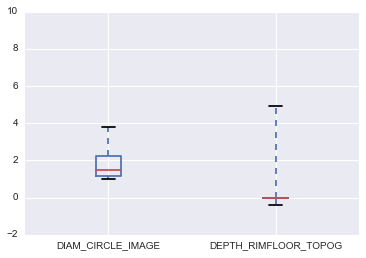

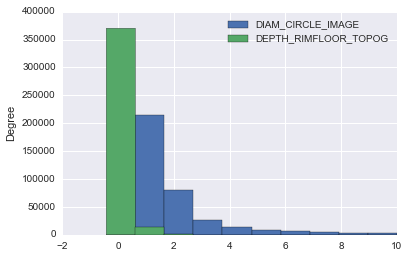

In [110]:
numericalDF =  data[craterDimensions]
numericalDF.plot(kind='box')
numericalDF.plot(kind='hist')

Is there a correlation between depth and size of crater?

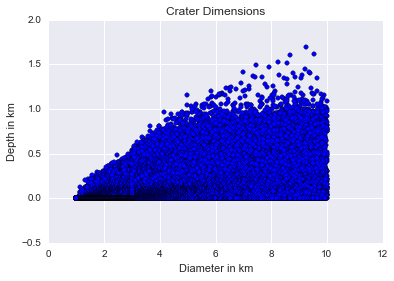

In [108]:
import matplotlib.pyplot as plt
plt.scatter(data.DIAM_CIRCLE_IMAGE,data.DEPTH_RIMFLOOR_TOPOG)
plt.title("Crater Dimensions")
plt.xlabel("Diameter in km")
plt.ylabel("Depth in km")
plt.show()

This looks promissing lets check spatial distribution of our data now

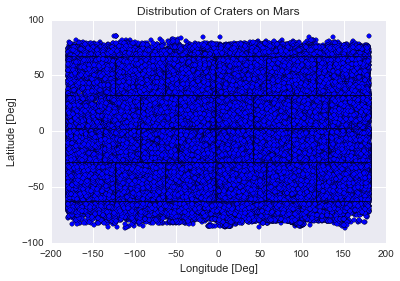

In [111]:
plt.scatter(data.LONGITUDE_CIRCLE_IMAGE,data.LATITUDE_CIRCLE_IMAGE)
plt.title("Distribution of Craters on Mars")
plt.xlabel("Longitude [Deg]")
plt.ylabel("Latitude [Deg]")
plt.show()

##Summary

Initial analysis suggest that we have enough data to vierify our hipothesis. We can already see logical correlation between crater diameter and average depth suggesting its impact nature. Even more important is that recorded craters are equally distributed on Mars surface.
